1. Import Library

In [89]:
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping as ES
from IPython.display import clear_output as cls

import matplotlib.pyplot as plt

2. Mengambil File train dan validasi yang sudah di extract sebelumnya kedalam folder data

In [90]:
train_dir = "data/train/"
val_dir = "data/val/"

3. Mengecek nama file dan jumlah file yang ada di dalam variabel train_dir

In [91]:
class_names = os.listdir(train_dir)
class_dis = [len(os.listdir(train_dir + name)) for name in class_names]

for name, dis in zip(class_names, class_dis):
    print(f"{name}: {dis}")

Tomato___Late_blight: 1000
Tomato___Early_blight: 1000
Tomato___Target_Spot: 1000
Tomato___Bacterial_spot: 1000
Tomato___Septoria_leaf_spot: 1000
Tomato___healthy: 1000
Tomato___Tomato_mosaic_virus: 1000
Tomato___Spider_mites Two-spotted_spider_mite: 1000
Tomato___Leaf_Mold: 1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1000


4. Melakukan penyesuaian gambar dengan menggunakan ImageDataGenerator untuk data train dan validasi.

    pada ImageDataGenerator juga digunakan beberapa parameter seperti rescale, shear_range, zoom_range dan horizontal_flip.

Hal ini dilakukan kepada 2 buah data yang saya miliki. Yaitu untuk data train dan validasi.

Hasilnya, kita bisa mengetahui data yang dimiliki oleh train dan validasi beserta jumlah class/kategori
 

In [101]:
train_datagen = ImageDataGenerator(
        rescale=1./255,                 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 10000 images belonging to 10 classes.


In [93]:
test_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.


5. Menampilkan data class/kategori dengan nama dan masing-masing gambar.

In [102]:
# Menginisialisasi fungsi, data merupakan batch data, class_names merupakan kumpulan nama class/kategori
def plot_images(data, class_names):
    
    # menentukan jumlah baris dan kolom dan menghitung jumlah gambar yang akan di tampilkan 
    # (note: akan ada 2 gambar yang saya karena total perkalian 12)
    r, c = 3, 4
    imgLen = r*c
    
    # membuat figur plot
    plt.figure(figsize=(20, 15))
    i = 1
    
    # melakukan iterasi untuk menampilkan gambar melalui parameter data yang  di fungsi plot_images
    for images, labels in iter(data):
        
        
        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)
        lab = class_names[np.argmax(labels[id])]
        
        plt.subplot(r, c, i)
        plt.imshow(img[0])
        plt.title(lab)
        plt.axis('off')
        cls()
        
        i+=1
        if i > imgLen:
            break
    plt.show()

6. Menampilkan hasil Fungsi plot_images yang sudah dibuat sebelumnya 

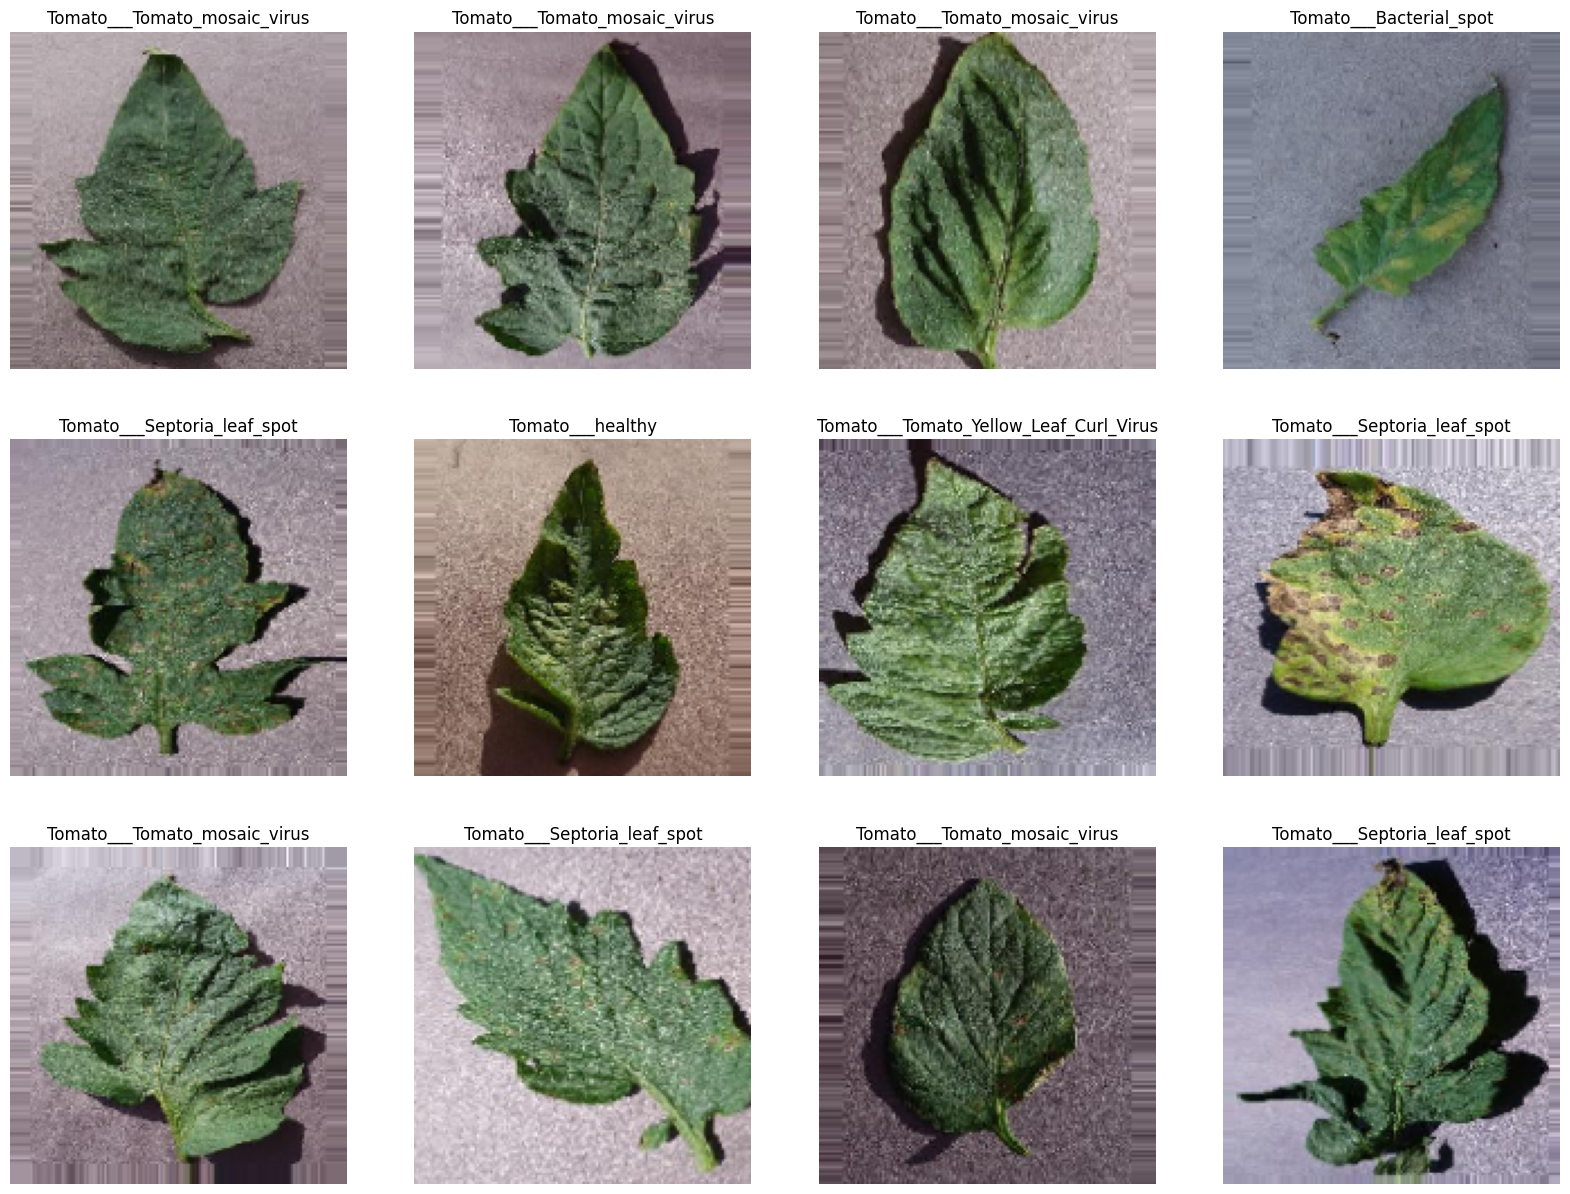

In [103]:
plot_images(train_generator, class_names)

7. Membuat Arsitektur model CNN yang akan dipakai untuk data gambar tomat 

In [18]:
# Menginisialisasi model dengan customName yaitu cnnFinal sebuah pembuka model
# (note : disini saya langsung mengambil fungsi-fungsi yang ada di tensorflow langsung dengan tf tanpa harus import satu per satu)
# (       Melakukan penyesuaian fungsi yang akan dipakai saja yang di panggil)
cnnFinal = tf.keras.models.Sequential()

#Convolution layer 1
cnnFinal.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnnFinal.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnnFinal.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnnFinal.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnnFinal.add(tf.keras.layers.Flatten())

#Full Conncetion
cnnFinal.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Full Conncetion
cnnFinal.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnnFinal.add(tf.keras.layers.Dense(units=10,activation='softmax'))



#Compiling disini seperti yang tertera dibawah ini
cnnFinal.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary dari model yang sudah di atur arsitekturnya
cnnFinal.summary()

# Dan terakhir fit model agar bisa dilakukan training pada model
temp = cnnFinal.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

8. Menampilkan grafik plot hasil model dari train dan val loss
    Menampilkan hasil grafik plot model dari train dan vall acc

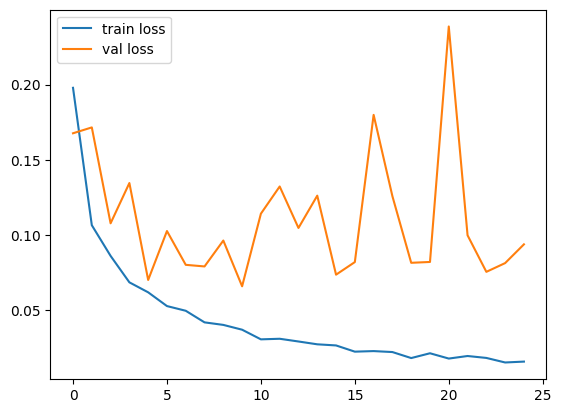

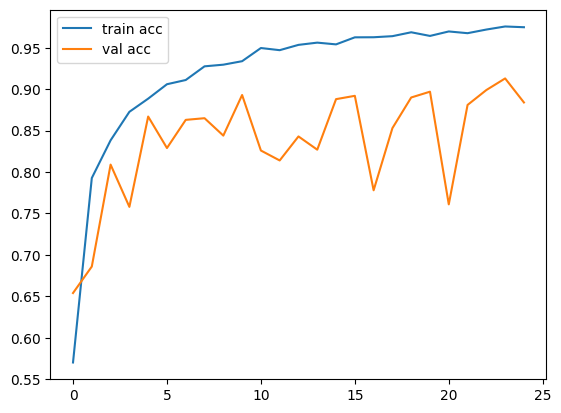

<Figure size 640x480 with 0 Axes>

In [104]:
# plot untuk loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot untuk accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

9. Melakukan test prediction model untuk sekedar melihat benar/salah test predict yang dilakukan oleh model yang sudah di training

In [105]:
# Testing the model
from keras.preprocessing import image

# Mengambil data gambar dari dalam folder val, lalu diubah kedalam bentuk array untuk bisa di test dengan model yang sudah di training
test = image.load_img("data/val/Tomato___Early_blight/0ba3d536-8732-4ea1-b3e1-a1be86e5dc6a___RS_Erly.B 9499.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)

result=cnnFinal.predict(test)

# Mendapatkan index prediksi
prediction = np.argmax(result)

# Mendapatkan nama kelas dari index prediksi
class_name = class_names[prediction]

print(f"Predicted class: {class_name}")

1/1 [==============================] - 0s 32ms/step
Predicted class: Tomato___Early_blight


10. Terakhir, menampilkan confusion matrix untuk setiap kategori yang telah ada pada data yaitu 10.

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mendapatkan label prediksi
label_prediksi = np.argmax(cnnFinal.predict(test_generator), axis=1)

# Mendapatkan label sebenarnya
label_benar = test_generator.classes

# Inisialisasi list kosong untuk menyimpan metrik
skor_akurasi = []
skor_presisi = []
skor_recall = []
skor_f1 = []

# Menghitung metrik untuk setiap kelas
for i, nama_kelas in enumerate(class_names):
    # Filter label benar dan prediksi berdasarkan kelas
    label_benar_filtered = label_benar == i
    label_prediksi_filtered = label_prediksi == i

    # Hitung skor akurasi, presisi, recall, dan F1 score untuk kelas tersebut
    skor_akurasi.append(accuracy_score(label_benar_filtered, label_prediksi_filtered))
    skor_presisi.append(precision_score(label_benar_filtered, label_prediksi_filtered))
    skor_recall.append(recall_score(label_benar_filtered, label_prediksi_filtered))
    skor_f1.append(f1_score(label_benar_filtered, label_prediksi_filtered))

    # Cetak metrik untuk setiap kelas
    print(f"\nMetrik untuk kelas {nama_kelas}:")
    print(f"Akurasi: {skor_akurasi[i]:.4f}")
    print(f"Presisi: {skor_presisi[i]:.4f}")
    print(f"Recall: {skor_recall[i]:.4f}")
    print(f"Skor F1: {skor_f1[i]:.4f}")




32/32 [==============================] - 3s 92ms/step

Metrik untuk kelas Tomato___Late_blight:
Akurasi: 0.8150
Presisi: 0.0707
Recall: 0.0700
Skor F1: 0.0704

Metrik untuk kelas Tomato___Early_blight:
Akurasi: 0.8320
Presisi: 0.1222
Recall: 0.1100
Skor F1: 0.1158

Metrik untuk kelas Tomato___Target_Spot:
Akurasi: 0.8130
Presisi: 0.0777
Recall: 0.0800
Skor F1: 0.0788

Metrik untuk kelas Tomato___Bacterial_spot:
Akurasi: 0.8310
Presisi: 0.1209
Recall: 0.1100
Skor F1: 0.1152

Metrik untuk kelas Tomato___Septoria_leaf_spot:
Akurasi: 0.8130
Presisi: 0.0857
Recall: 0.0900
Skor F1: 0.0878

Metrik untuk kelas Tomato___healthy:
Akurasi: 0.8310
Presisi: 0.0741
Recall: 0.0600
Skor F1: 0.0663

Metrik untuk kelas Tomato___Tomato_mosaic_virus:
Akurasi: 0.8300
Presisi: 0.1500
Recall: 0.1500
Skor F1: 0.1500

Metrik untuk kelas Tomato___Spider_mites Two-spotted_spider_mite:
Akurasi: 0.8250
Presisi: 0.1053
Recall: 0.1000
Skor F1: 0.1026

Metrik untuk kelas Tomato___Leaf_Mold:
Akurasi: 0.8140
Presisi: 0